# EKI Tutorial for IFC


## INCLUDE .bash_profile configuration in tutorial directory

Date: 7/11/2023

The purpose of this script is to give a brief overview of how to run tests using asynch on the Argon cluser at University of Iowa which:

1. Runs an ensemble of independent asynch model runs (Model ID: 609) iteratively
2. Utilizes Ensemble Kalman Inversion (EnKF applied to only the parameters) to learn an ensemble of parameters which perform well over the assimilation window
3. Records the values of the ensemble of parameters and measured discharge values at several locations specified in a specified file for post-processing

## Setting up this folder

To setup this tutorial, place the folder on your home folder in the Argon cluster. 

Make sure to load the following, and compile asynch with the following modules loaded 
```module load stack/2021.1```
```module load hdf5/1.10.7_intel-2021.2.0-mpi```
within the command line. 

Then, create a folder titled ```venv``` using ```mkdir venv```, and run a command ```python -m venv ./venv```.

From here, load the virtual environment using ```source venv/bin/activate```.

Make sure to ```pip install``` the following libraries:
1. ```numpy```
2. ```tqdm```
3. ```scipy```

Additionally, run

```pip install python-dateutil --upgrade```

From this point onwards, at the begginging of running tests, run ```source venv/bin/activate``` to use the virtual environment.

Ensure you have access to the IFC queue. For more details on the cluster, see https://wiki.uiowa.edu/display/hpcdocs/Argon+Cluster 

## Filesystem 

This filesystem is organized with a typical project structure in mind. Here's a brief explanation of what each file and folder represents:

- `Tutorial_for_IFC/` : This is the root directory of the project. It contains all other files and directories. 

  - `eki_test.py`: This script contains the main function for running the EKI test.
  - `EKI_Tutorial.ipynb`: This Jupyter notebook provides a tutorial on how to use the EKI functionality.
  - `eki.py`: This script contains the EKI related functions.
  - `io_ifc.py`: This script handles input/output operations relating to the EKI and asynch.
  - `run.py`: This script is used to execute the asynch runs.
  - `latent.py`: This script contain functions to create and transform latent variables.
  - `test.json`: This JSON file contains test parameters for the examples EKI test.
  - `util.py`: This script contains utility functions.
  
  - `out/`: The output directory, usually contains all outputs generated from the script.
    - `05464000`: The output directory for subbasin with outlet with USGS ID 05464000.
      - `npy/`: Contains pickle files of the ensemble output simulations and corresponding parameters at each iteration.
      - `utils/`: Contains csv files of mean and standard deviation of the simulations and corresponding parameters at each iteration.

  - `tmp/`: A directory containing all the temporary files created by the asynch runs and EKI test.
    - `05464000`: The temporary directory for subbasin with USGS ID 05464000.

  - `example_files/`: A directory containing files utilized in the running of the tests.
    - `sub-watershed/`: A directory containing files utilized in the running of the tests.
      - `05464000.rvr`: The rvr file for the sub-basin with outlet with USGS ID 05464000.
      - `05464000.prm`: The prm file for the sub-basin with outlet with USGS ID 05464000.

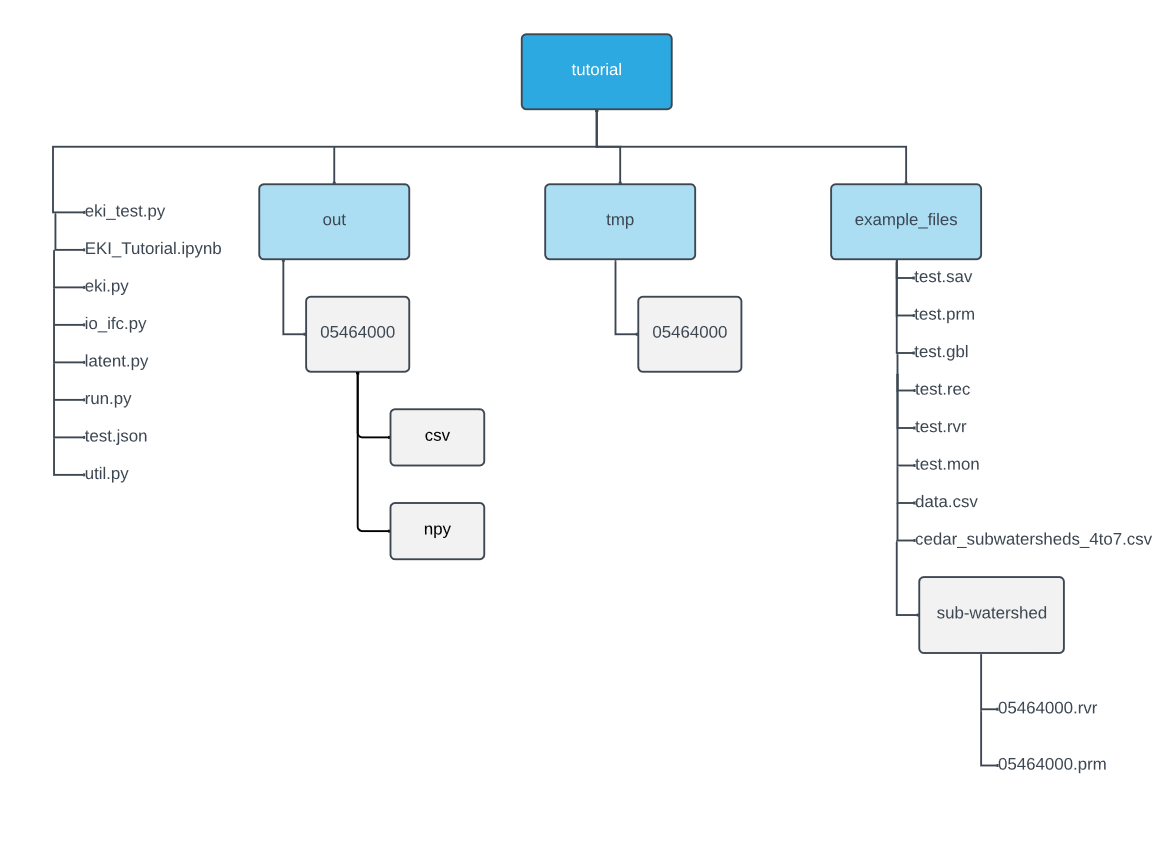



## JSON test file


The JSON test file contains configuration values that are used for running tests with your script. 

For more details on the specific file formats mentioned below, see:
https://asynch.readthedocs.io/en/latest/getting_started.html
https://github.com/Iowa-Flood-Center/asynch/tree/develop


Below is an explanation of each key-value pair in the JSON object:

### Key-value pairs used for configuring test

1. `time_start` (string): The start time for the test in the format "YYYY-MM-DD HH:mm".

2. `time_end` (string): The end time for the test in the format "YYYY-MM-DD HH:mm".

3. `steps` (integer): The number of EKI iterations in the test.

### Key-value pairs used for the measurment data

5. `meas_csv` (string): The file path to the CSV file containing data from `time_start` to `time_end` at several IDs.

6. `meas_usgs` (string): USGS id number of data sensor utilized for assimilation.

7. `meas_sav` (string): The file path to the SAV file containing IDs in the order of the measurement `meas_csv`.

8. `meas_type` (string): The type of measurement used in the EKI ('metric', 'threshold', or 'none')

9. `thresh_val` (integer): The cutoff discharge value used for 'metric' and 'threshold' values of `meas_type`.

10. `abs_std_meas` (float): The absolute measurment standard deviation value.

11. `rel_std_meas` (float): The relative measurment standard deviation value.

12. `out_dir` (string): The directory path to store the output files, saving at all IDs within `meas_sav` file.

### Key-value pairs used for locating configuration files for asynch tests

13. `rvr` (string): The file path to the RVR (River Network Routing) file.

14. `rec` (string): The file path to the initial conditions REC file.

15. `prm` (string): The file path to the template PRM (Parameter) file, used to determine number of parameters and values of unassimilated parameters.

16. `mon` (string): The file path to the monthly evaporation forcing MON file.

17. `rain_dir` (string): The directory path to the rainfall data.

18. `tmp_dir` (string): The directory path to store temporary files.

### Key-value pairs used for configuring the EKI

19. `watershed_csv` (string): The file path to a CSV file containing information about watersheds division for local self-similar parameters.

20. `watershed_depth` (integer): The cutoff horton order for the local self-similar parameters.

21. `prm_dist` (list of strings): A list of flags (either "True" or "False") indicating if parameter distribution is enabled for each parameter.

22. `prm_lb` (list of floats): A list of lower bounds for each parameter.

24. `prm_ub` (list of floats): A list of upper bounds for each parameter.

23. `prm_std` (list of floats): A list of standard deviations for each parameter in latent space.


Please make sure to fill in each key with the appropriate value that corresponds to your specific test scenario.

Note: The paths provided in the JSON file should be relative to the location of your Jupyter notebook or the script being executed.

Lets view our example of this, saved in `test.json`:
``` 
{
    "time_start": "2016-07-01 00:00",
    "time_end": "2016-10-15 00:00",
    "steps": 11,
    "meas_csv": "example_files/data.csv",
    "meas_usgs": "05464000",
    "meas_sav": "example_files/test.sav",
    "meas_type": "metric",
    "thresh_val": 0,
    "abs_std_meas": 100.0,
    "rel_std_meas": 2.0,
    "out_dir": "out/05464000/",
    "rvr": "example_files/sub-watershed/05464000.rvr",
    "rec": "example_files/test.rec",
    "prm": "example_files/sub-watershed/05464000.prm",
    "mon": "example_files/test.mon",
    "rain_dir": "/Dedicated/IFC/data_bin/hd_iowa/mrms/0708/2016/",
    "tmp_dir": "tmp/05464000/",
    "watershed_csv":"example_files/cedar_subwatersheds_4to7.csv",
    "watershed_depth": 8,
    "prm_dist": ["False", "False", "False", "False", "False", "False", "False", "False", "False", "False", "False", "False", "False", "False", "False", "True", "False", "True"],
    "prm_lb": [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.05, 0.0, 0.05],
    "prm_ub": [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.0, 0.5]
    "prm_std": [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3, 0.0, 0.3],
}
```

## Running the test

To run the test, execute the following command ```python eki_test.py test.json 100```

This will run the main test using the configuration from test.json with 100 ensemble members. The last two arguments may be changed to alter the number of ensemble member of the test json file utilized.

## Outputs of the test

Within ```out/05464000```, the test will create two folders, ```csv``` and ```npy```:

- ```csv```, mean and standard deviation statistics will be contained on the ensemble parameters and discharge at each iteration of the EKI. 
- ```npy```, a pickle file consisting of the ensemble of parameters and discharge values will be contained for each iteration of the EKI

## Flowchart of EKI

A brief description of the EKI procedure:

1. An ensemble of $J$ (latent) parameter sets is initialized.
2. Using the HLM (solved with asynch), $J$ simulations are obtained.
3. From the $J$ simulations, $J$ measurment sets are obtained from the forward simulations. We consider 3 operators here, the standard EKI operator, the Event-driven operator, and the threshold operator.
4. Using the $J$ measurment sets, a new set of $J$ (latent) parameter sets are obtained by applying a set of the EnKF with the (latent) parameter sets utilized as the states.




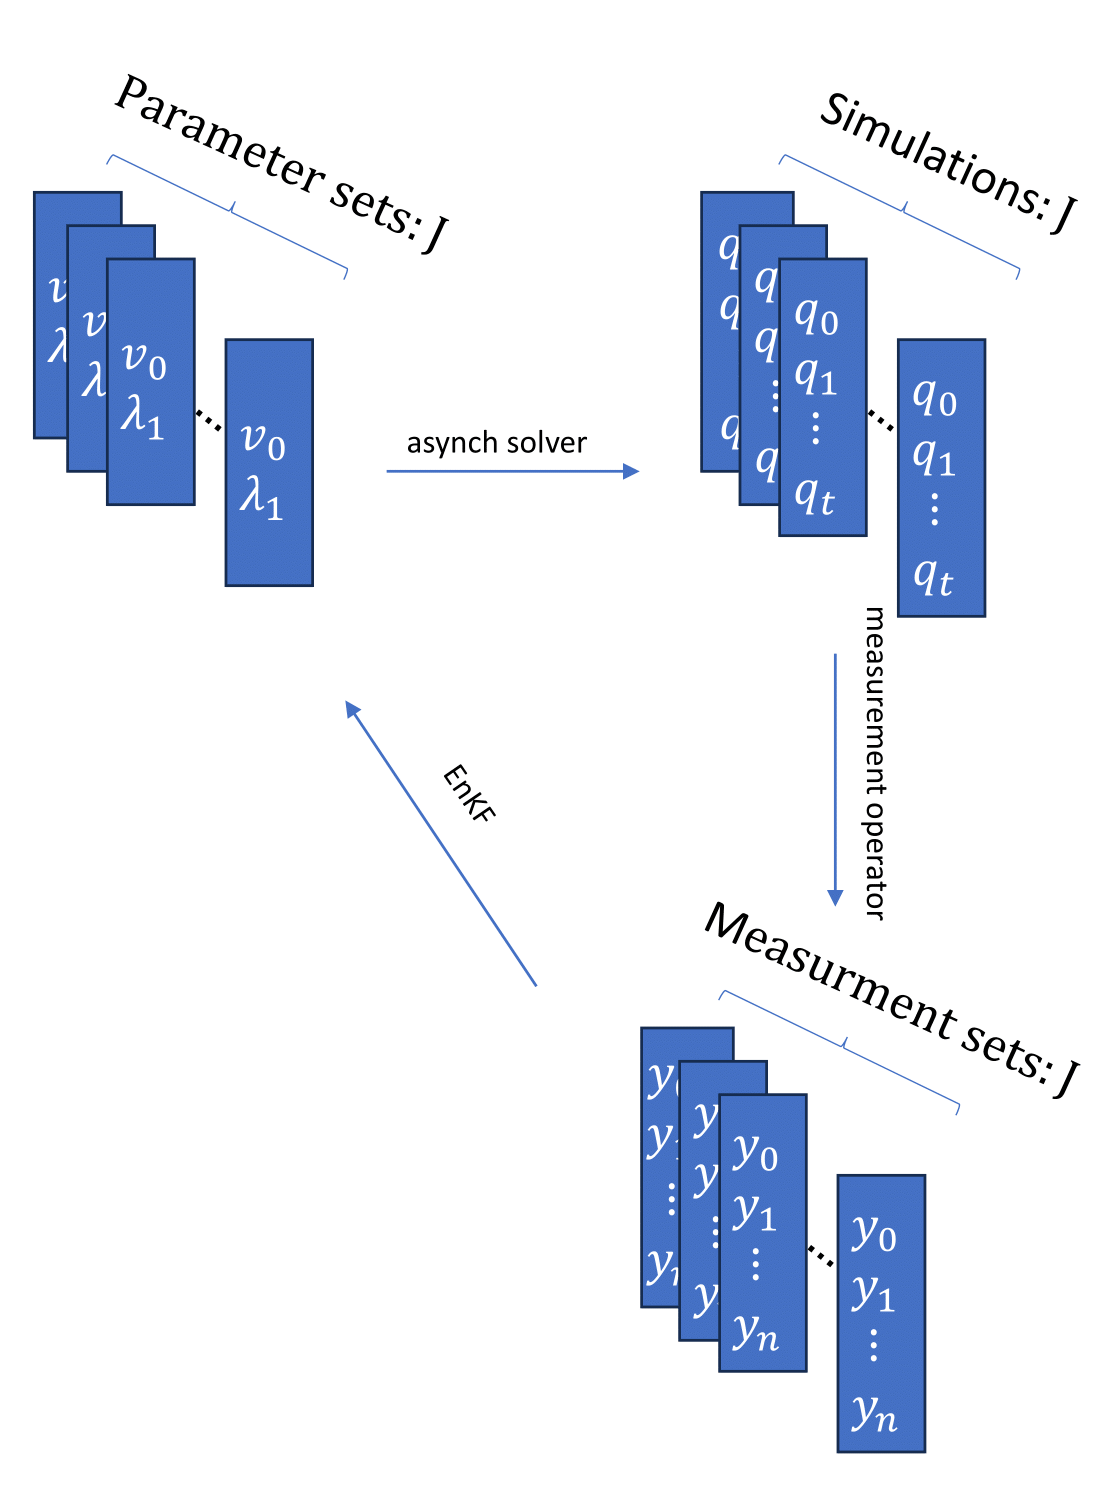

## Explanation of standard EKI operator

The standard EKI operator leaves utilizes all available data, and uses all $q_1, ..., q_t$ forward simulations obtained in the first step. 

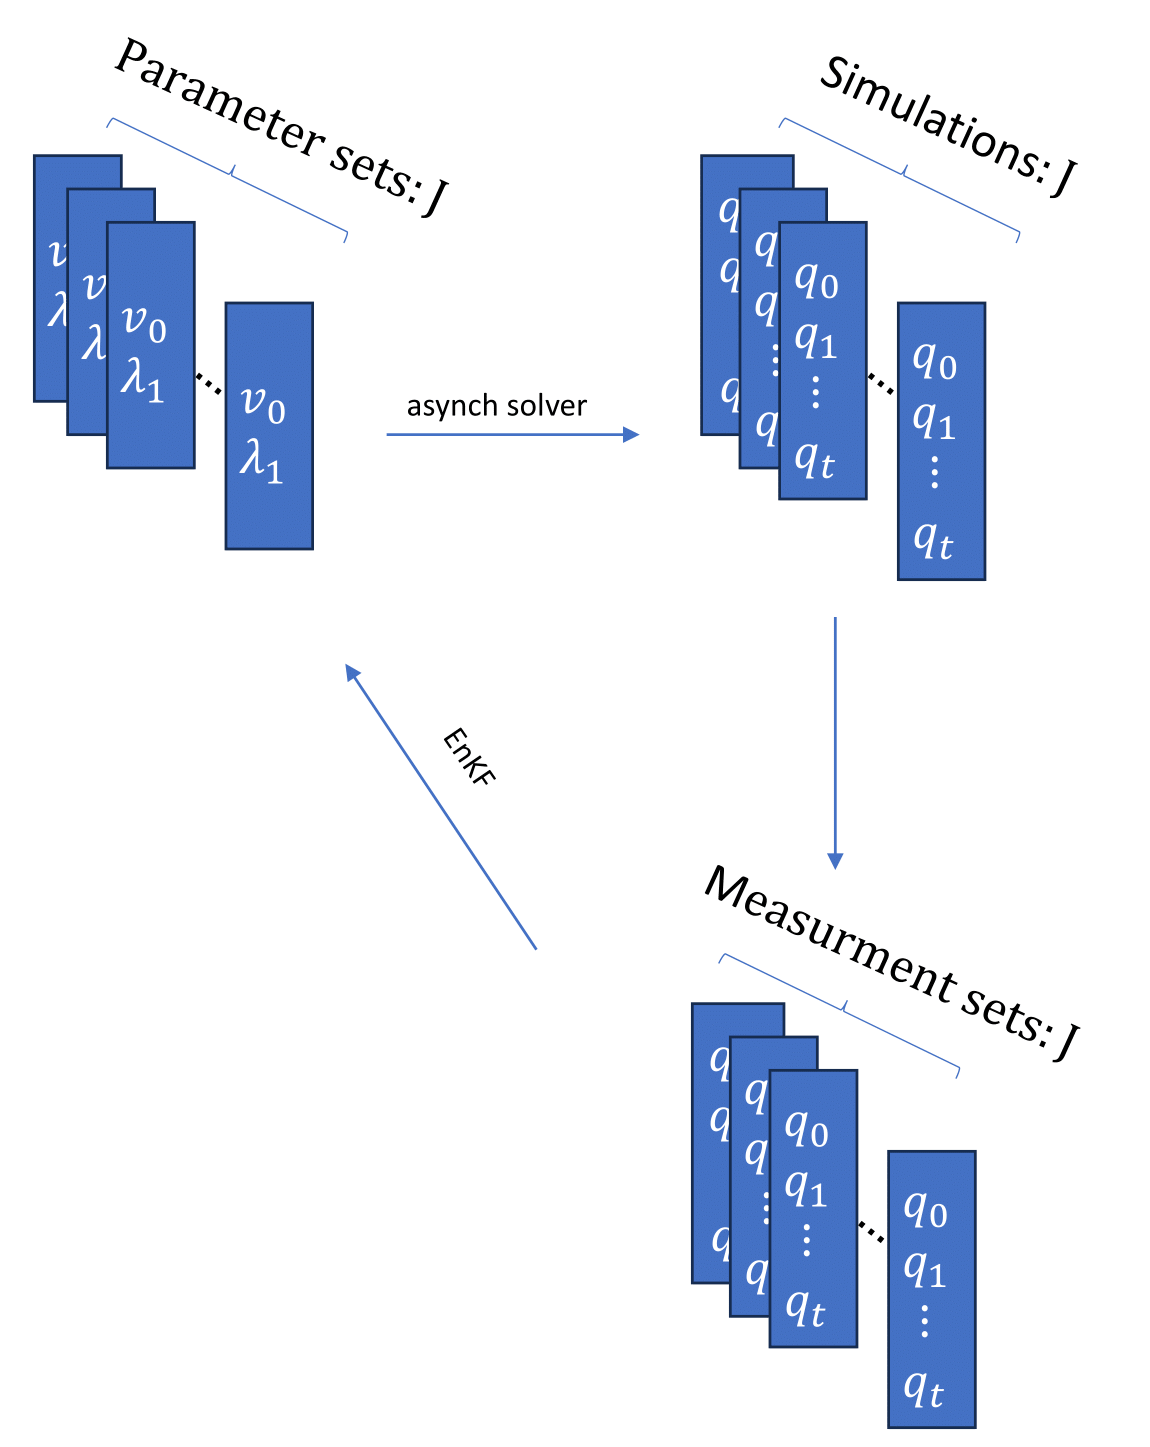

## Explanation of threshold EKI operator

The threshold EKI operator utilizes a minimum streamflow $q^*$, check the available data to obtain time stamps corresponding to times where the data was larger than this value, then selects all $q_1, ..., q_t$ forward simulation obtained at each of these time stamps.

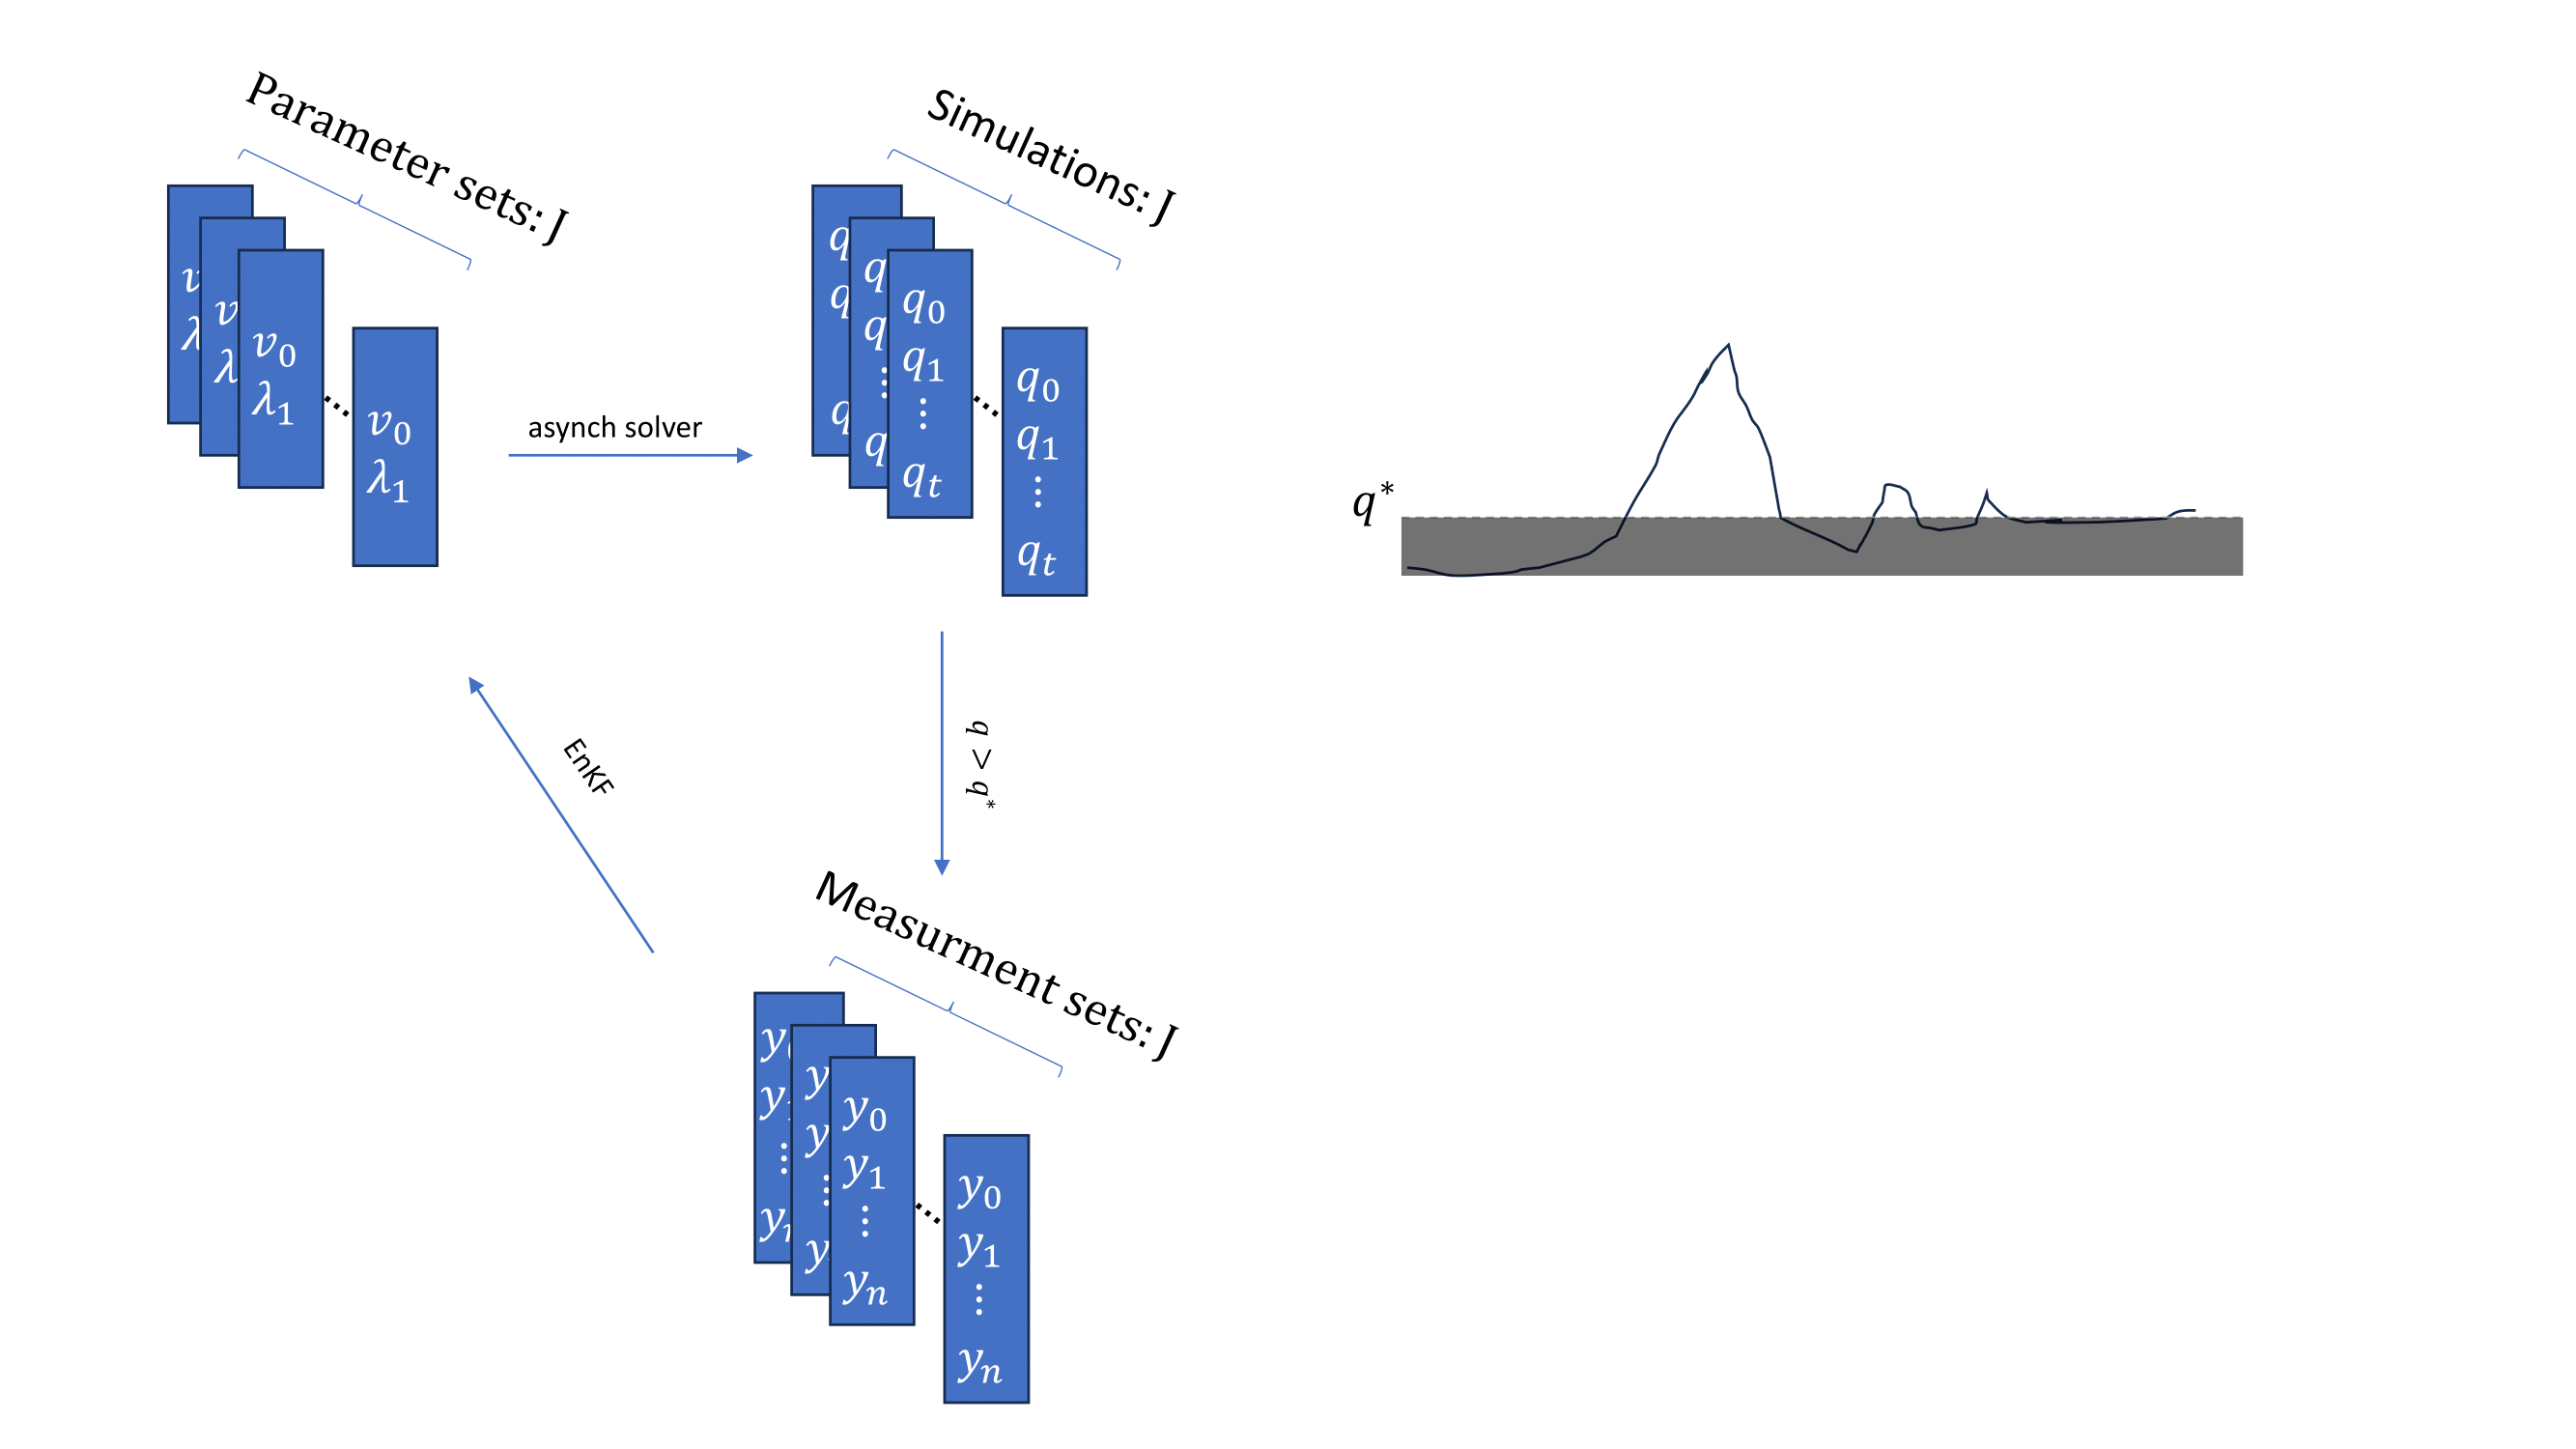

## Explanation of event driven EKI operator

The event driven EKI operator identifies the time stamps of several events within the original data set, utilizes the time stamps to calculate several statistics, and calculates these statistics within each event time stamps to obtain the forward operator. The statistics are:

1. Average with respect to streamflow over the event over the event time stamps.
2. Weighted average of time stamp weighted by the corresponding streamflow value over the event time stamps.
3. Standard deviation with respect to streamflow over the event over the event time stamps.
4. Weighted standard deviation of the time stamp weighted by the corresponding streamflow value over the event time stamps.

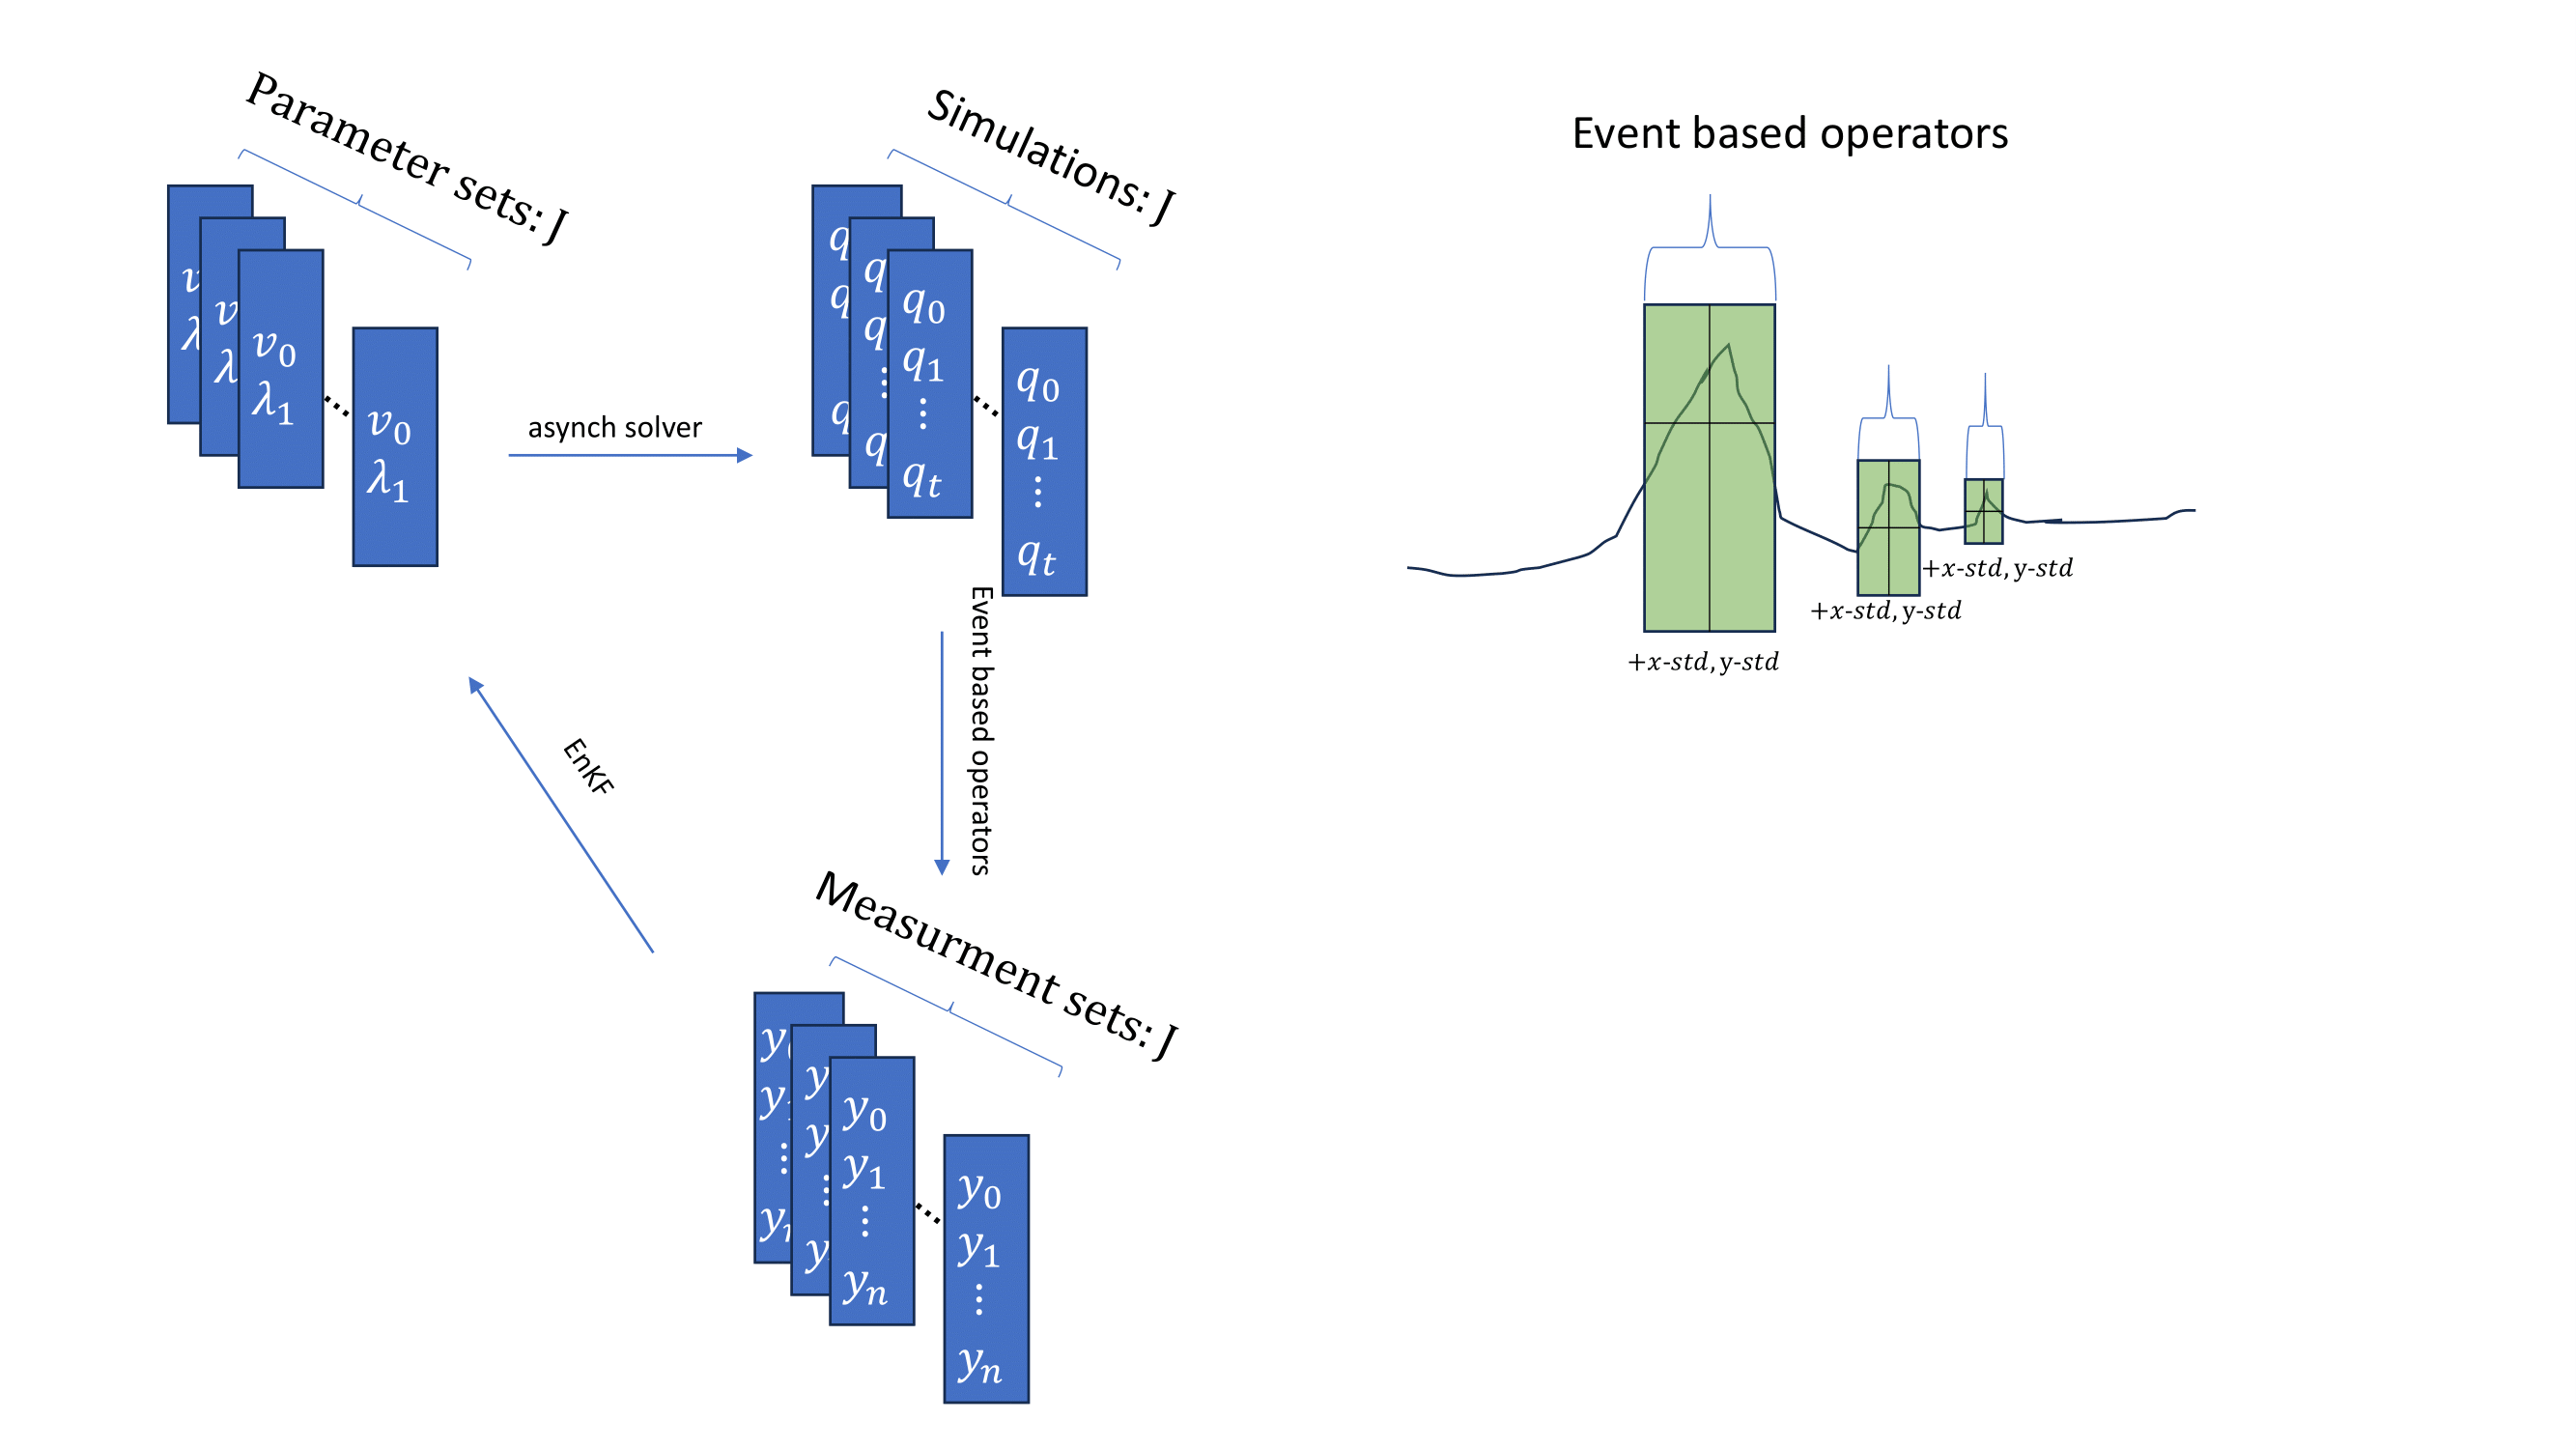

## Insites and challenges with EKI

1. Ensemble size should be no smaller than 20 to obtain reasonable results.
2. The  ```prm_std``` values are difficult to determine a priori and should be tuned such that you obtain reasonably large confidence intervals over a validation data set.
3. When the results yield too small confidence intervals, increase the ensemble size and ```prm_std``` values.
4. If the mean performance is poor, try shrinking ```prm_std```, ```abs_std_meas```, and ```rel_std_meas```.
5. If the results are unstable over iteration, try increasing ```prm_std```, ```abs_std_meas```, and ```rel_std_meas```.
6. The ratio of  ```prm_std``` to ```abs_std_meas``` and ```rel_std_meas``` plays an important role in the performance as well.
7. The choice of transformation function is clearly important as it affects the size space our latent variable live in, this has not greatly been explored, although it probably should as a better tranformation function which better centers the desried values of the parameters in transformed space will correspond to a better prior. Currently the choice was made to ensure the transformed variables were unbounded.
8. Currently, we cannot explore attempts to correct initial conditions, forcings, or other non-prm quantities. Particulatly the forcings likely would have a strong impact on the performance I believe.

## TODO - Features to add or modify in code

1. Currently, a conversion between link ID and USGS ID is hardcoded into ```ifc_usgs_fileorder.py```. Instead, this information probably should be stored in a seperate json file, and referenced in the test.json parameter file.
2. Currently, ```the eki_test.py``` makes assumptions that only one streamflow sensor is available for assimilation. This should at some point be changed to enable multiple sensors.
3. Currently, a lot of the model details are hardcoded to only work with the model ID 608, including the number of parameters, in ```io_ifc.py```. This isn't necessary, and some script to handle multple model IDs, particularly, the gbl creation, could be encorperated.
4. Currently, this code only works with parameters stored in a .prm file. Additional code that enabled the concatination of other parameters in the model, as well as states, could be included, but this feature does not currently exist.
5. Currently, only one transormation is utilized in ```latent.py``` to convert from a bounded space to a unbounded space. Other choice may be better, and this should be explored, or at least the feature enable. This could included enabling transformation to a beta distribution, which would enable weighting more likely locations of paramters more heavily.
6. Additionally, currently the event-driven operator in ```eki.py``` has a set of 4 metrics included for each event. More metrics or the ability to include the metrics, might be desirable.